# Preparing notebook

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['PYTHONHASHSEED'] = '2'

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

import keras
from keras.models import load_model

from F5_func_file import *

/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.1 when it was built against 1.14.0, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


## Load model and data

In [3]:
#Load the upsampling model
upsampling_model = load_model("Upsampling_model.h5", 
                              custom_objects={"Custom_mse_conv_func": Custom_mse_conv_func, "Custom_mae_conv_func": Custom_mae_conv_func})

In [4]:
#Load the sequence of 500 SMLM images and the reference localization image
frames = Load_sequence()
hd_image = np.array(Image.open("SOSplugin_hd_image.png"))

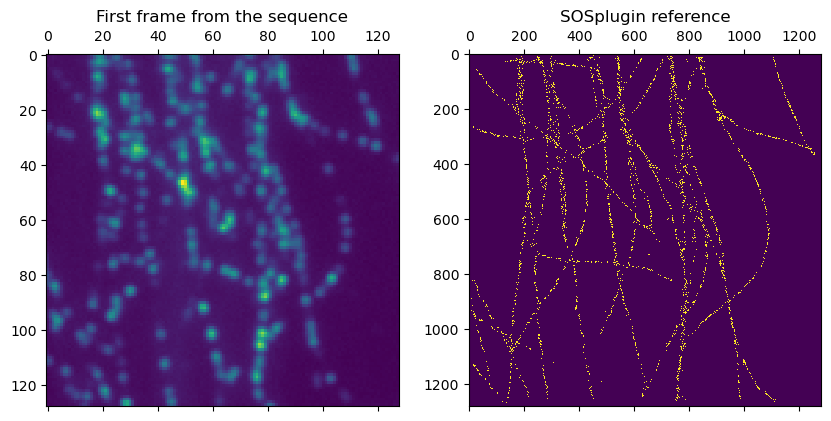

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.matshow(frames[0], fignum=False)
plt.title("First frame from the sequence")

plt.subplot(122)
plt.matshow(hd_image, fignum=False)
plt.title("SOSplugin reference")

plt.show()

## Evaluating

In [6]:
predicted, norms = Reconstruct_data_with_model(frames, upsampling_model)

reconstructed = np.mean(predicted * norms[:,None,None], axis=0)

16/16 [==============================] - 26s 1s/step


### Visualize the full image

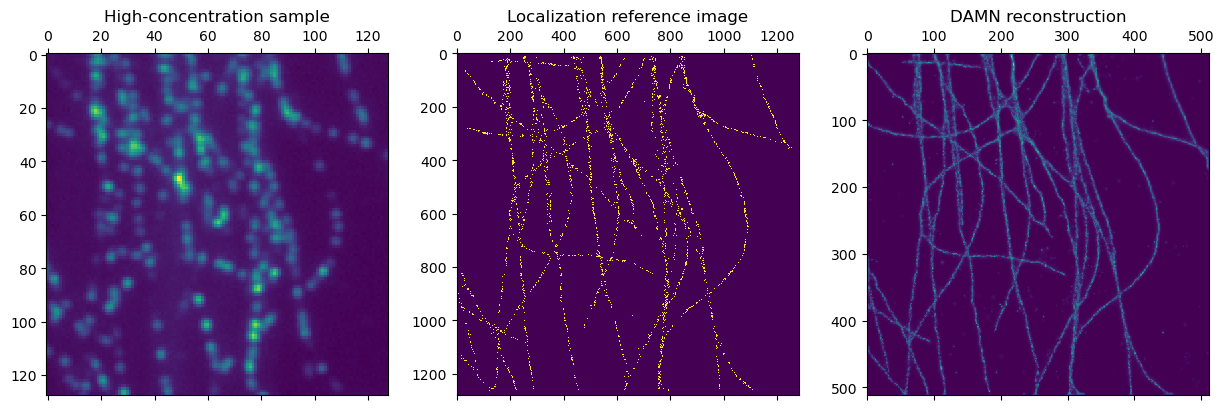

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.matshow(frames[0], cmap="viridis", fignum=False)
plt.title("High-concentration sample")

plt.subplot(132)
plt.matshow(hd_image, cmap="viridis", fignum=False)
plt.title("Localization reference image")

plt.subplot(133)
plt.matshow(reconstructed, cmap="viridis", fignum=False, 
           norm=mpl.colors.PowerNorm(0.5, vmin=reconstructed.min(), vmax=reconstructed.max()))
plt.title("DAMN reconstruction")

plt.show()

### Visualize the cutout

In [8]:
a1 = 20          #Position to vertically start at (in the 128x128 field)
a2 = a1 + 30     #Position to vertically end at (in the 128x128 field)

b1 = 20          #Position to horizontally start at (in the 128x128 field)
b2 = b1 + 30     #Position to horizontally end at (in the 128x128 field)

In [9]:
#Calculating the corresponding positions in the LOC reference image and the DAMN reconstruction
frame_cutout = frames[0,a1:a2,b1:b2]
hd_image_cutout = hd_image[10*a1:10*a2, 10*b1:10*b2]
reconstructed_cutout = reconstructed[4*a1:4*a2, 4*b1:4*b2]

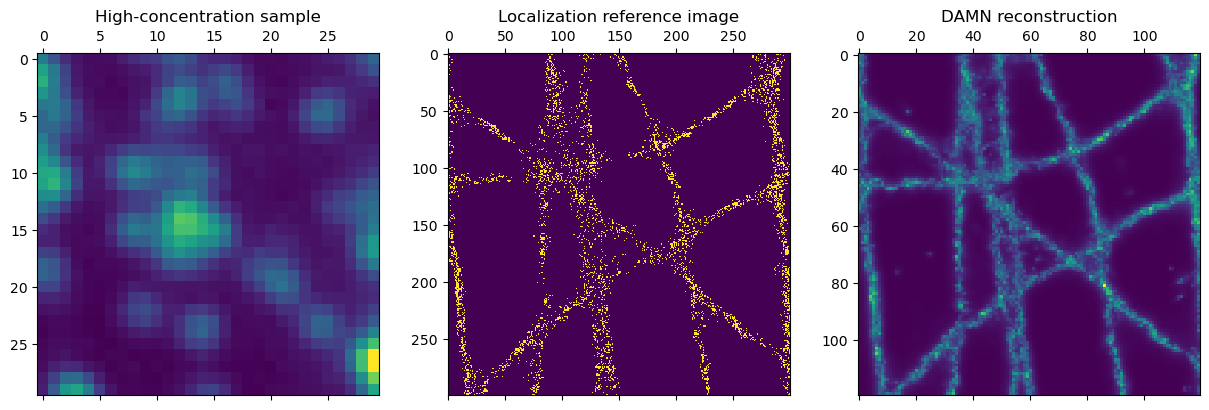

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.matshow(frame_cutout, cmap="viridis", fignum=False)
plt.title("High-concentration sample")

plt.subplot(132)
plt.matshow(hd_image_cutout, cmap="viridis", fignum=False)
plt.title("Localization reference image")

plt.subplot(133)
plt.matshow(reconstructed_cutout, cmap="viridis", fignum=False, 
           norm=mpl.colors.PowerNorm(0.5, vmin=reconstructed_cutout.min(), vmax=reconstructed_cutout.max()))
plt.title("DAMN reconstruction")

plt.show()